# GRIP Internship Task-01

### Author : Irfana Sultana Shaik

## Prediction Using Supervised ML

### What is Supervised Learning?


In Supervised Learning, you train the machine using data which is well "labelled". It means some data is already tagged with the correct answer. It can be compared to learning which takes place in the presence of a supervisor or a teacher.

Supervised learning algorithm learns from labelled training data, helps you to predict outcomes for unseen data.


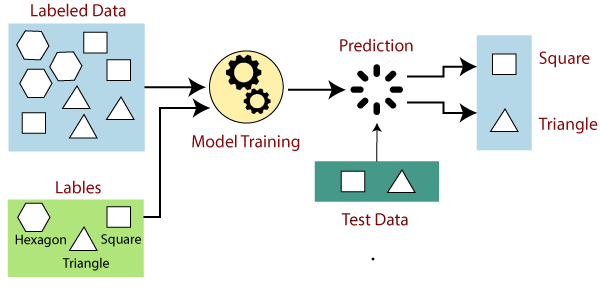

## Linear Regression

Linear Regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables. Linear regression finds how the value of the dependent variable is changing according to the value of the independent variable. 


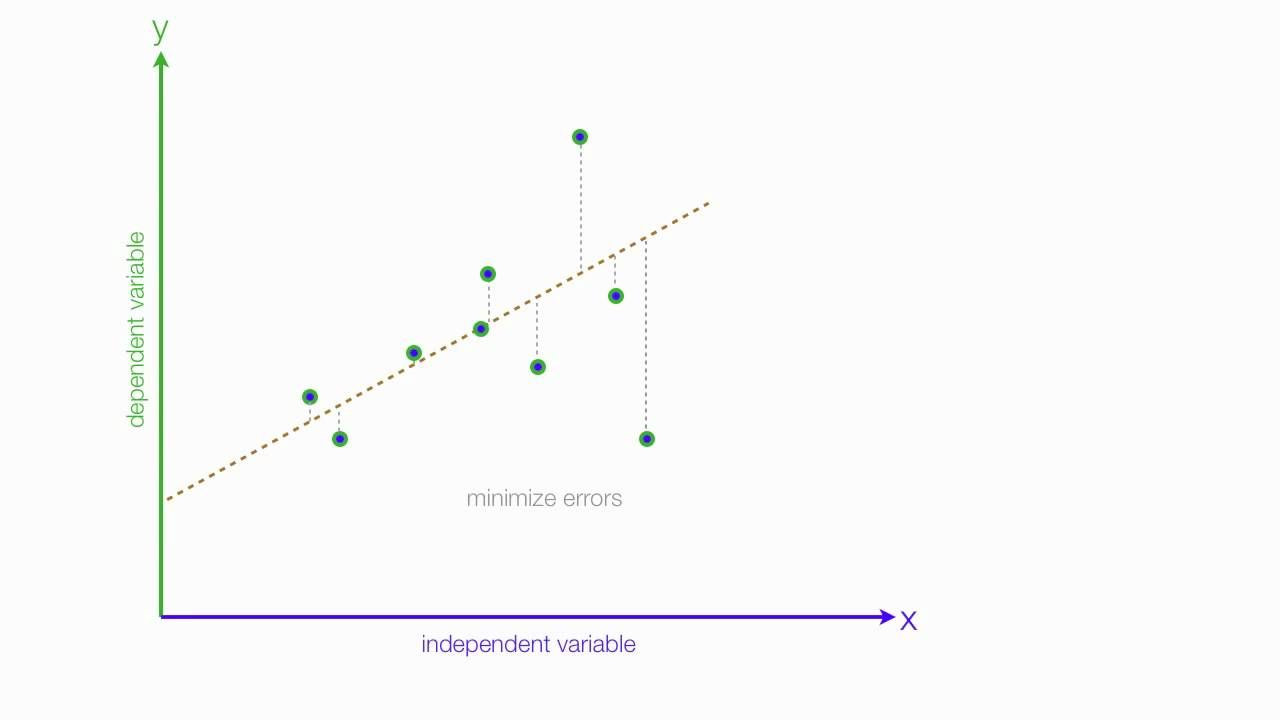

### Simple Linear Regression:

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import the dataset
url='http://bit.ly/w-data'
df=pd.read_csv(url)
print("data imported successfully")

data imported successfully


In [3]:
# top five rows of a DataFrame
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

#### Let's plot our data points on 2-D graph to find any relationship between the data.

<Figure size 432x288 with 0 Axes>

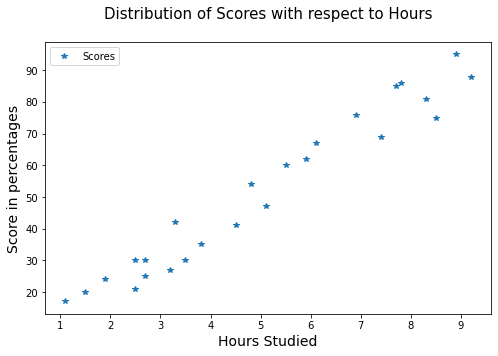

In [5]:
#Plotting the data to visualize the distribution of scores 

fig = plt.figure()

df.plot(x='Hours', y='Scores', style='*',figsize=(8,5))  
plt.title('Distribution of Scores with respect to Hours\n', fontsize=15)  
plt.xlabel('Hours Studied', fontsize=14)  
plt.ylabel('Score in percentages', fontsize=14)  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = df.iloc[:, :-1].values  # Hours
y = df.iloc[:, 1].values    # score

The next step is to split this data into training and test sets. 

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training the Algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  

#fitting model on training data
lr.fit(X_train, y_train)

LinearRegression()

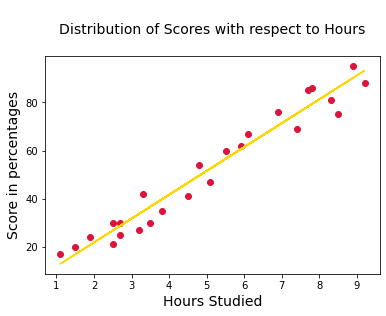

In [9]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

fig = plt.figure()

# Plotting for the test data
plt.scatter(X, y,color='crimson')
plt.plot(X, line, color='gold');
plt.title('\nDistribution of Scores with respect to Hours\n', fontsize=14)  
plt.xlabel('Hours Studied', fontsize=14)  
plt.ylabel('Score in percentages', fontsize=14)  
plt.show()

### Making Predictions

In [10]:
y_pred = lr.predict(X_test)

### Compared Actual vs Predicted

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Task Question

In [12]:
# What will be the predicted score if a student studies for 9.25 hrs/day?
hours = 9.25
own_pred = lr.predict([[hours]])
print("Number of Hours to study = {}".format(hours))
print("Predicted Score in % = {}".format(own_pred[0]))

Number of Hours to study = 9.25
Predicted Score in % = 93.69173248737538


### Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [13]:
from sklearn import metrics

In [14]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  4.183859899002975
Mean Squared Error =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
